# Spectral Clustering on Mall Customers Dataset

In [2]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

In [3]:
# Step 2: Load dataset
df = pd.read_csv("mall_customers.csv")

In [16]:
df.head(6)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
5,6,Female,22,17,76,3


In [4]:
# Step 3: Select features 
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [18]:
X.head(5)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [8]:
# Step 4: Apply Spectral Clustering
model = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42)
labels = model.fit_predict(X)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
# Step 5: Add cluster labels to the dataframe
df['Cluster'] = labels

In [20]:
df.head(6) # after updating labels

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
5,6,Female,22,17,76,3


In [12]:
# Step 6: Evaluate with silhouette score
sil_score = silhouette_score(X, labels)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.5416865319025136


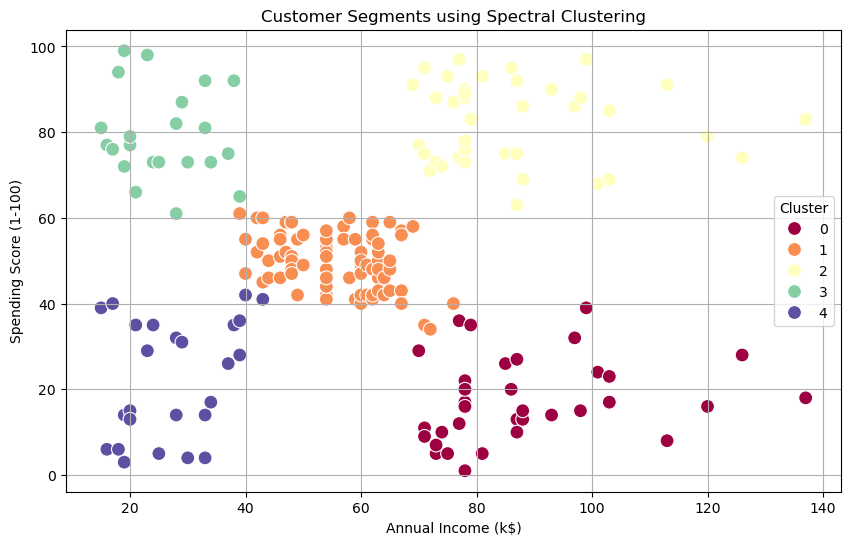

In [14]:
# Step 7: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Spectral', s=100)
plt.title("Customer Segments using Spectral Clustering")
plt.grid(True)
plt.show()